In [2]:
import pandas as pd

In [9]:
re_movies_df = pd.read_csv('movie_out.csv',encoding='utf-8')
re_movies_df.head(2)

,id,영화제목,개봉일,매출액,매출액.1,누적매출액,관객수,누적관객수,스크린수,상영횟수,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,스파이더맨: 노 웨이 홈,2021-12-15,"53,772,689,910",4.9%,53772689910,5369773,5369773,2948,137848,...,0.0,0.0,0.009087,0.0,0.0,0.041833,0.0,0.0,0.0,0.0
1,1,남산의 부장들,2020-01-22,"41,225,216,650",3.8%,41225216650,4750345,4750345,1659,140051,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [10]:
re_movies_df.shape

(3299, 25122)

In [11]:
# 그 외 필요한 전처리
X = re_movies_df.copy()
y = re_movies_df['누적관객수']
X.drop(['id','영화소개','누적관객수','영화제목','개봉일','매출액','매출액.1','누적매출액','관객수','스크린수','상영횟수','body_key','body_pos'],inplace=True,axis=1)
X.shape, y.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Columns: 25109 entries, 제작사_(사)정신대할머니와함께하는시민모임 to 4999
dtypes: float64(5000), int64(20109)
memory usage: 632.0 MB


In [16]:
#deicision tree
from sklearn.tree import DecisionTreeRegressor

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as numpy
from scipy.sparse import hstack

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [13]:
# 모델 생성 및 훈련
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [14]:
# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R2: {r2}')

MSE: 1396275800999.154, R2: 0.33859491886584137


In [16]:
from sklearn.model_selection import GridSearchCV

In [20]:
# 결정나무 모델에 대한 그리드 서치를 위한 하이퍼파라미터 범위 설정
param_grid = {
    'max_depth': [10, 20, 30, 1000, 5000, None], # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10, 100, 1000], # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4, 100, 1000]    # 리프 노드에 있어야 하는 최소 샘플 수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, # 5겹 교차 검증 사용
                           n_jobs=-1, # 모든 CPU 코어 사용
                           verbose=2)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
최적의 하이퍼파라미터: {'max_depth': 1000, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [21]:
# 최적의 하이퍼파라미터로 모델 재훈련
best_model = grid_search.best_estimator_

In [22]:
# 모델 재평가
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R2: {r2}')

MSE: 1028451213868.0004, R2: 0.5128305897272363


In [24]:
df = pd.read_csv('movie_out.csv',encoding='utf-8')
df.head(2)

,id,영화제목,개봉일,매출액,매출액.1,누적매출액,관객수,누적관객수,스크린수,상영횟수,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,스파이더맨: 노 웨이 홈,2021-12-15,"53,772,689,910",4.9%,53772689910,5369773,5369773,2948,137848,...,0.0,0.0,0.009087,0.0,0.0,0.041833,0.0,0.0,0.0,0.0
1,1,남산의 부장들,2020-01-22,"41,225,216,650",3.8%,41225216650,4750345,4750345,1659,140051,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [25]:
y = df['누적관객수']
X = df.copy()
# 불필요한 열 삭제
X.drop(['id','영화소개','누적관객수','영화제목','개봉일','매출액','매출액.1','누적매출액','관객수','스크린수','상영횟수','body_key','body_pos'], inplace=True, axis=1)

In [26]:
## 임포트

# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터셋 분할
from sklearn.model_selection import train_test_split

# 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [27]:
# 데이터셋 분할

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,
                                                random_state = 42) # 개발중에는 random

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size = 0.2,
                                                random_state = 42) # 개발중에는 random

In [29]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3299, 25109) (3299,)
(2639, 25109) (2639,)
(660, 25109) (660,)
(660, 25109) (660,)


In [40]:
## 임포트

# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터셋 분할
from sklearn.model_selection import train_test_split

# 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [30]:
# DT01 - default, max depth만 range(2, 21)
# 학습하기
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [32]:
import matplotlib.pyplot as plt

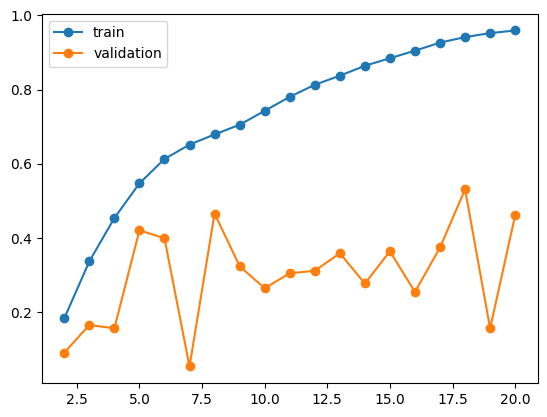

In [33]:
train_scores = []
val_scores = []

for md in range(2, 21):
    dt = DecisionTreeRegressor(max_depth = md)

    dt.fit(X_train, y_train)

    train_score = dt.score(X_train, y_train)
    train_scores.append(train_score)

    val_score = dt.score(X_val, y_val)
    val_scores.append(val_score)

plt.plot(range(2, 21), train_scores, 'o-', label='train')
plt.plot(range(2, 21), val_scores, 'o-', label='validation')
plt.legend()
plt.show()

In [34]:
best_dt = DecisionTreeRegressor(max_depth = 17)
best_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17)

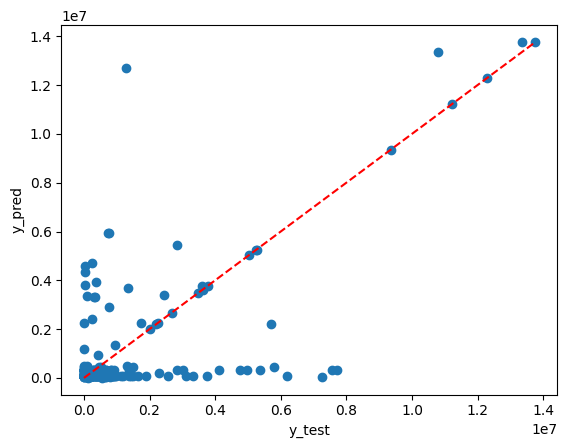

In [35]:
y_pred = dt.predict(X_test)


plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [44]:
# 평가하기 1) R2

print("R2-train 데이터:", dt.score(X_train, y_train))
print("R2-test 데이터:", dt.score(X_test, y_test))

print("RMSE-train 데이터:", rmse_train)
print("RMSE-test 데이터:", rmse_test)

R2-train 데이터: 0.9592678171934174
R2-test 데이터: 0.4612058379361438
RMSE-train 데이터: 316779.0621010667
RMSE-test 데이터: 1066505.9503668454


In [41]:
# 평가하기 2) RMSE

# 모델 활용해 예측하기
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)


# MSE
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("RMSE-train 데이터:", rmse_train)
print("RMSE-test 데이터:", rmse_test)

RMSE-train 데이터: 316779.0621010667
RMSE-test 데이터: 1066505.9503668454


In [42]:
# GridSearchCV: 입력한 파라미터의 조합 중 최고 성능을 가지는 파라미터 조합 찾기
from sklearn.model_selection import GridSearchCV

In [ ]:
# 모델 = DT Regressor, CV = 3, 평가지표 = R2
best_dt = DecisionTreeRegressor()

grid_params = {
    'ccp_alpha': [0.0, 0.1, 0.2],
    'criterion': ["mse", "friedman_mse", "mae", "poisson"],
    'max_depth': [None, 10, 20, 30],
    'max_features': ["auto", "sqrt", "log2", None],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [42],
    'splitter': ["best", "random"]
}

grid_dt = GridSearchCV(best_dt, param_grid = grid_params, cv=3, refit = True ,  scoring='r2')
# refit : True가 디폴트, True이면 가장 좋은 파라미터 설정으로 학습시켜서 모델 반환

grid_dt.fit(X_train, y_train)